# Homework: GCFS prediction

Stine Fohrmann

## Exploring the data set

tas_dm_GCFS2-1_144x72_r1i3p3_199003-201908.nc:

- tas

- dm

- GCFS2-1 -> German Climate Forecast System 2.1

- 144x72 -> lon: 144 (0 to 357.5), lat: 72 (-88.75 to 88.75)

- r1i3p3

- 199003-201908 -> daily resolution (14:56) from 1990-03-01 to 2019-08-31 (only Mar-Aug (MAMJJA))

- temperature variable: temp2


data/tas_dm_GCFS2-1_144x72_r1i8p2_199008-202402.nc:

- 144x72 -> lon: 144 (0 to 357.5), lat: 72 (-88.75 to 88.75)

- 199008-202402 -> daily resolution from 1990-08-01 to 2024-02-31 (only Aug-Feb (ASONDJF))

- temperature variable: var167


data/tas_dm_GCFS2-1_144x72_r1i11p3_198211-202004.nc:

- 144x72 -> lon: 144 (0 to 357.5), lat: 72 (-88.75 to 88.75)

- 198211-202004 -> daily resolution from 1982-11-01 to 2020-04-30 (only Nov-Apr (NDJFMA))

- temperature variable: temp2


In [ ]:
# Imports
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import pandas as pd
from functions import *

In [3]:
# Read data (temps in K)
data_era5 = read_from_file()
data_gcfs = read_from_file('data/tas_dm_GCFS2-1_144x72_r1i3p3_199003-201908.nc')
# data_era5

In [4]:
# Calculate reference climatology (1940-1969) (in K)
climatology = compute_climatology(data_era5)

# Select GCFS data around Oslo (1990-03 - 2019-08) (in K)
data_gcfs_oslo = get_data_subset(data_gcfs, start_date='1990-03', end_date='2019-08')
data_era5_oslo = get_data_subset(data_era5)

In [5]:
# Count predicted HWDs in JJA from GCFS data (1990-2019)
gcfs_hwd_yrs, gcfs_hwd = count_hwd(data_gcfs_oslo, climatology, 
    start_year=1990,
    end_year=2019,
    start_month=6,
    end_month=8
    )

In [6]:
# Count observed HWDs in JJA from ERA5 data
era5_hwd_yrs, era5_hwd = count_hwd(data_era5_oslo, climatology,
    start_month=6,
    end_month=8
)

In [7]:
# Count observed HWD in MAM from ERA5 -> persistence prediction
hwd_MAM_years, hwd_MAM = count_hwd(data_era5_oslo, climatology,
    start_month=3,
    end_month=5
)

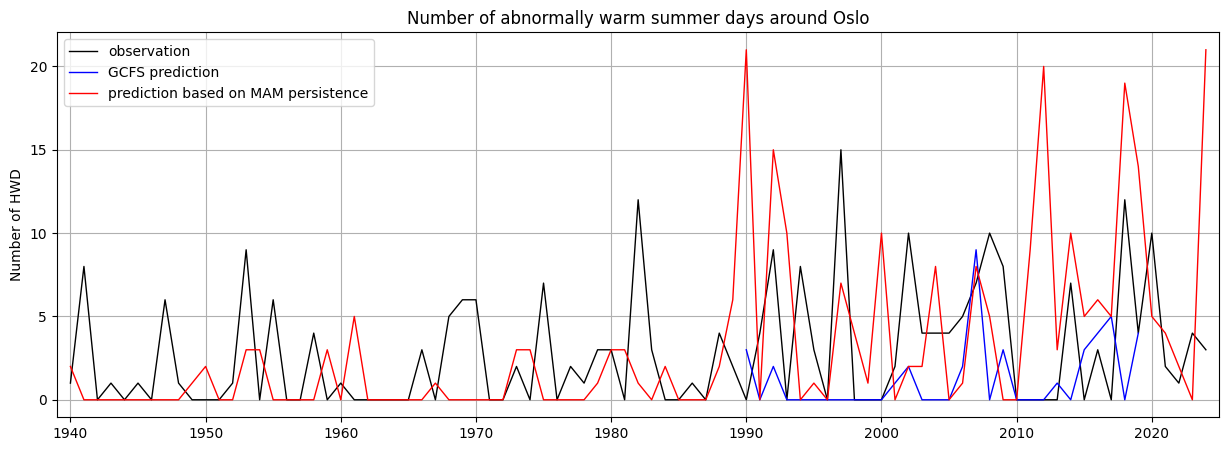

In [9]:
# Plot time series of JJA HWD
plt.figure(figsize=(15,5))

# Plot observed summer HWD (ERA5)
plt.plot(era5_hwd_yrs, era5_hwd, '-', c='k', lw=1, label='observation')

# Predicted summer HWDs (GCFS)
plt.plot(gcfs_hwd_yrs, gcfs_hwd, '-', c='blue', lw=1, label='GCFS prediction')

# Prediction based in MAM peristence
plt.plot(hwd_MAM_years, hwd_MAM, '-', c='red', lw=1, label='prediction based on MAM persistence')

# Plot prediction based on May persistence
# plt.plot(years, hwd_May, '-', lw=1, label='predicted HWD in JJA')

# Plot prediction based on average number of summer HWD
# plt.plot(years, hwd_avg_array, '-', lw=1, label='average (1940-1969)')

# Plot prediction based on average number of summer HWDs of previous 5 years
# plt.plot(years, previous_years_prediction, '-', label=f'average (previous {num_years} years)')


# Fig settings
plt.title('Number of abnormally warm summer days around Oslo')
plt.ylabel(r'Number of HWD')
# plt.xlabel(r'time')
plt.grid()
plt.legend()
arial_font = {'fontname': 'monospace'}
# plt.xticks(years[::5], labels=[f'JJA\n{y}' for y in years[::5]], **arial_font)
plt.xlim(xmin=1939, xmax=2025)

plt.savefig('plots/homework-gcfs-prediction.png')
plt.show()
